In [1]:
pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (16 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-1.0.0-cp312-abi3-macosx_11_0_arm64.whl.metadata (5.6 kB)
Using cached librosa-0.11.0-py3-none-any.whl (260 kB)
Using cached audioread-3.1.0-py3-none-any.whl (23 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 18.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 23.7 MB/s  0:00:01 eta 0:00:01
Using cached pooch-1.8.2-py3-none-any.whl (64 kB)
Using cached soundfile-0.13.1-py2.py3-none-macosx_11_0_arm64.whl (1.1 MB)
Using cached soxr-1.0.0-cp312-abi3-macosx_11_0_arm64.whl (163 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9/9 [librosa]m7/9 [numba]te]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: /usr/local/bin/python3.12 -m pi

Classes found: ['microwave_bell', 'background', 'microwave', 'toaster_up_down', 'tooth', 'cornflakes_bowl', 'cup', 'toilet_flush', 'vacuum_cleaner', 'microwave_door', 'hair_dryer', 'water_tap', 'toilet_button', 'plates_sorting', 'stirring_cup', 'cornflakes_eating', 'food_processor', 'flatware_sorting', 'water_boiler', 'washing_machine', 'bag', 'blender', 'electric_razor', 'dish_washer']


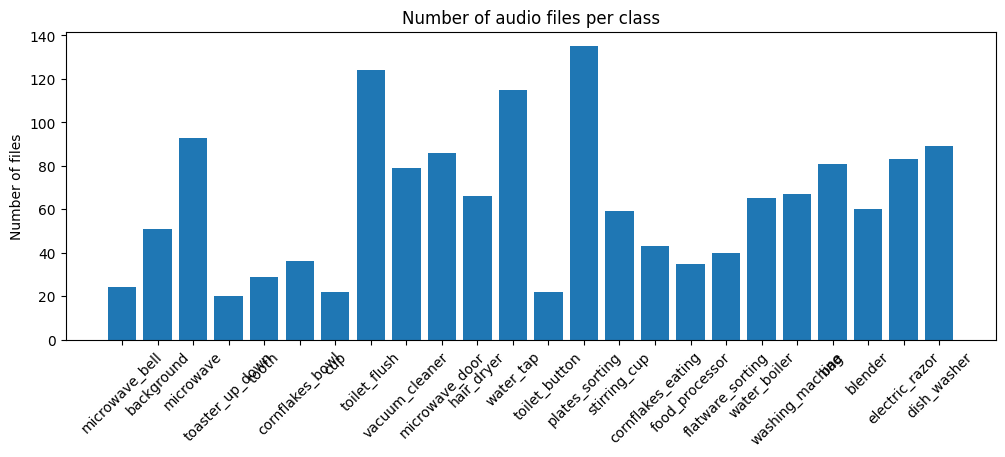

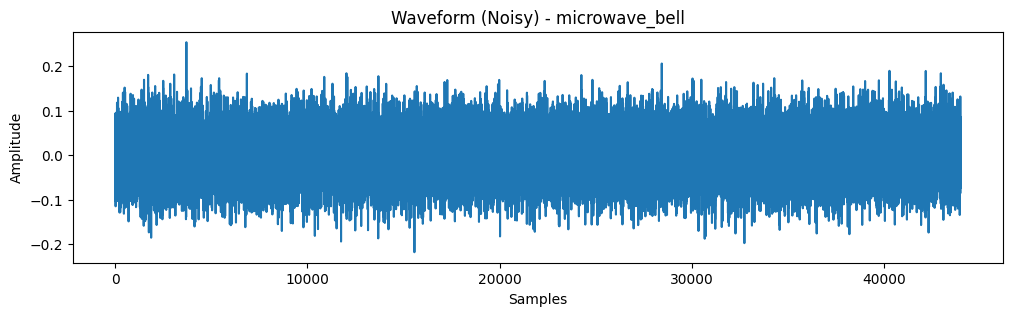

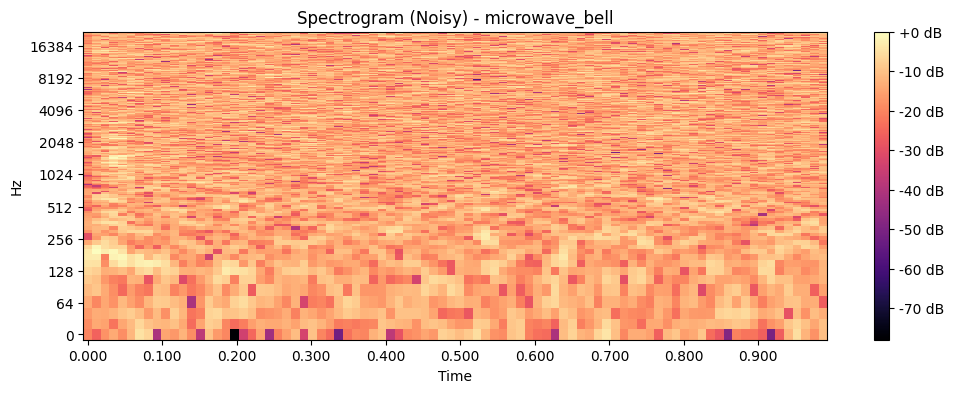

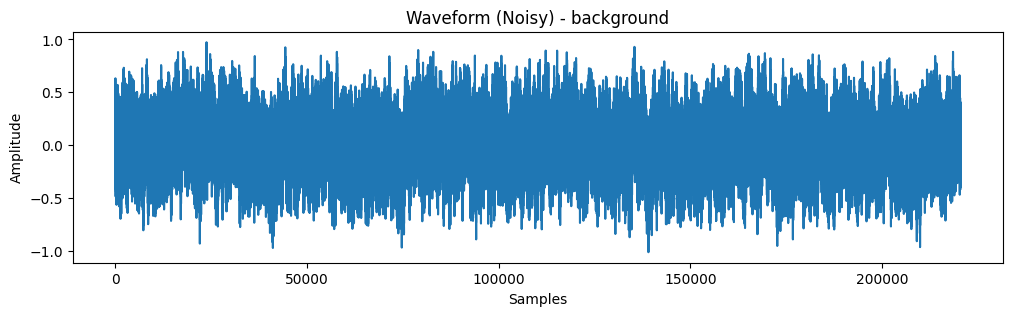

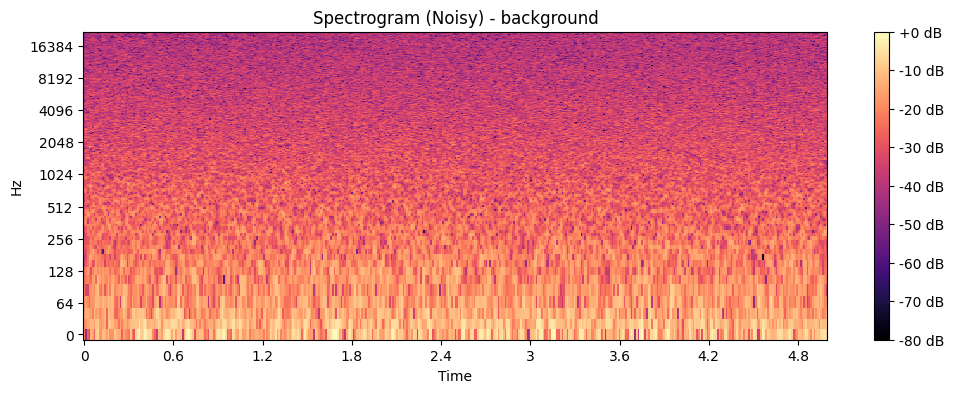

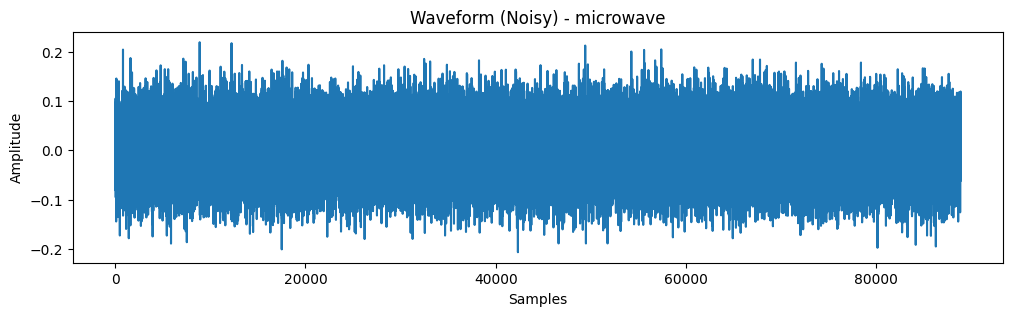

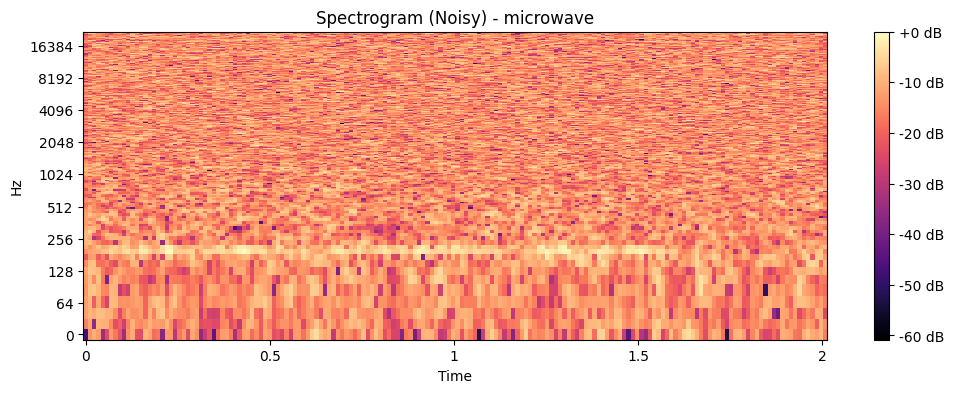

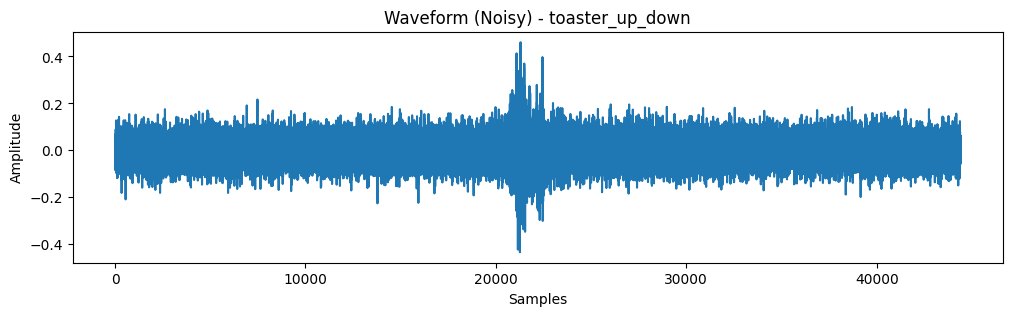

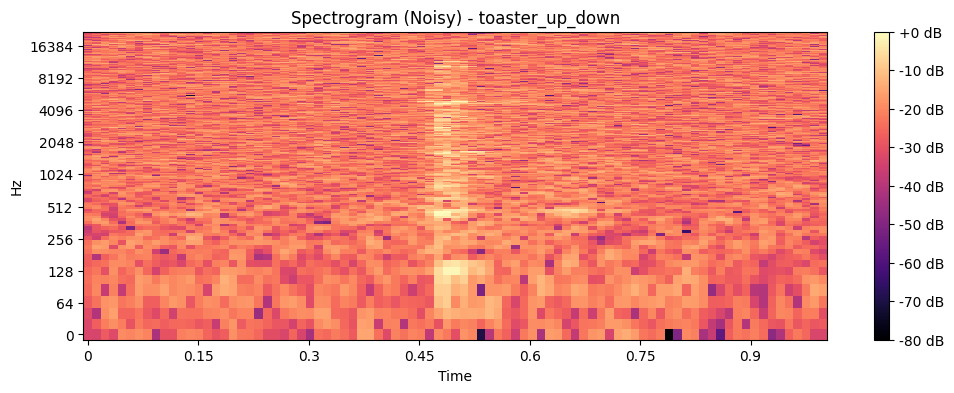

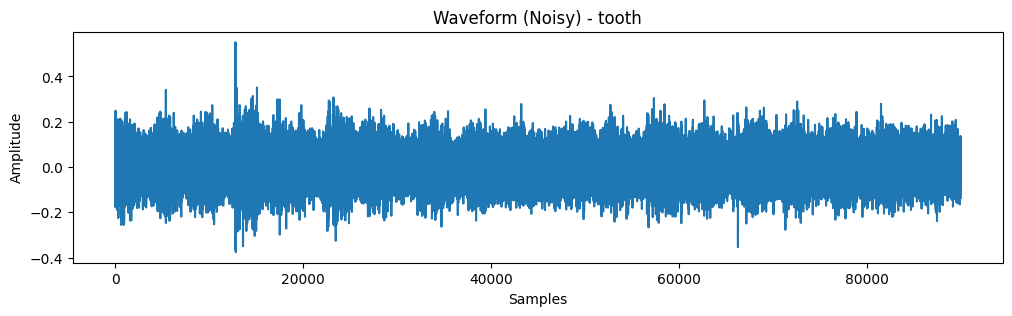

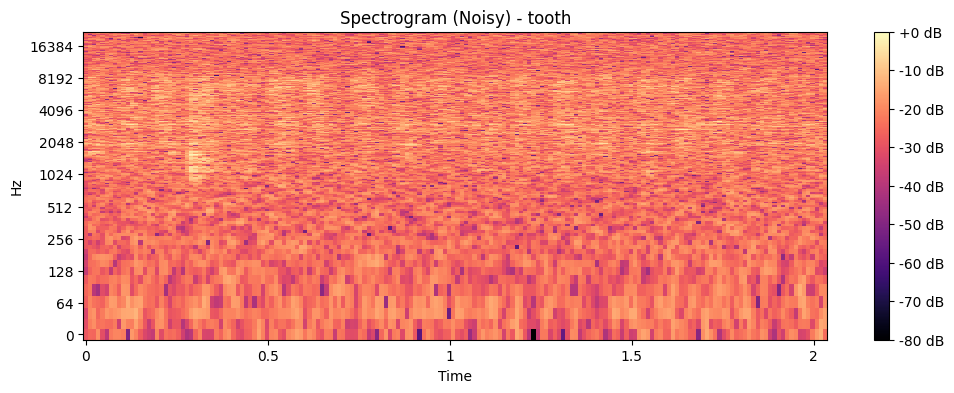

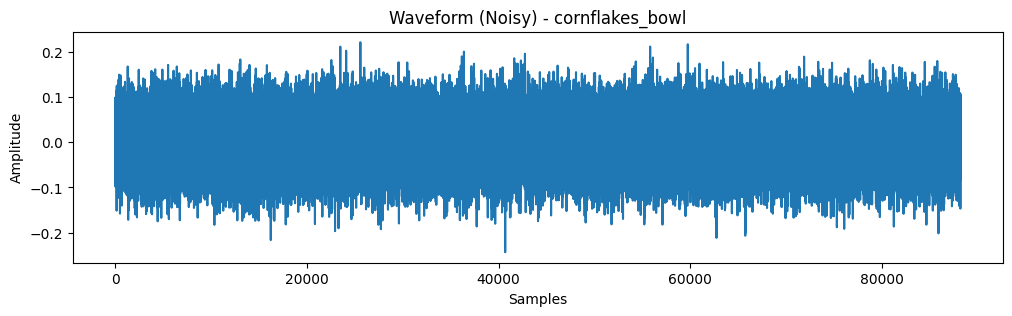

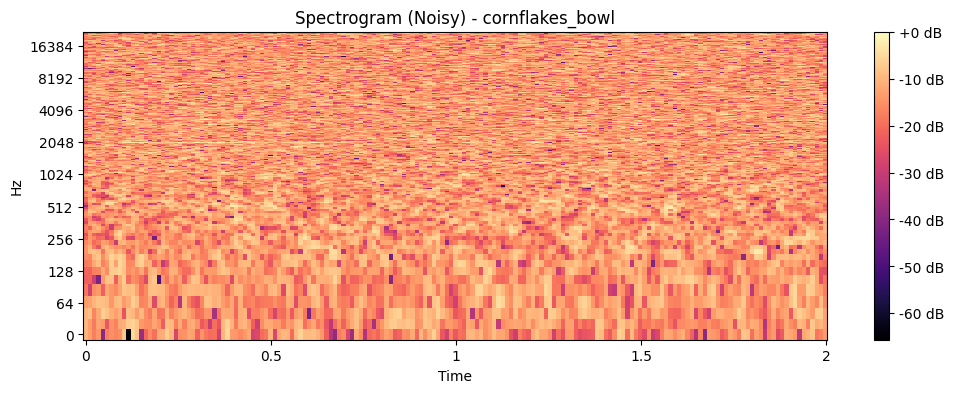

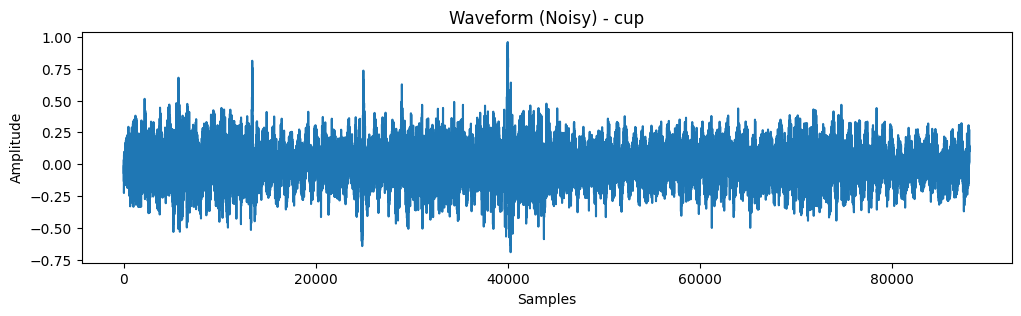

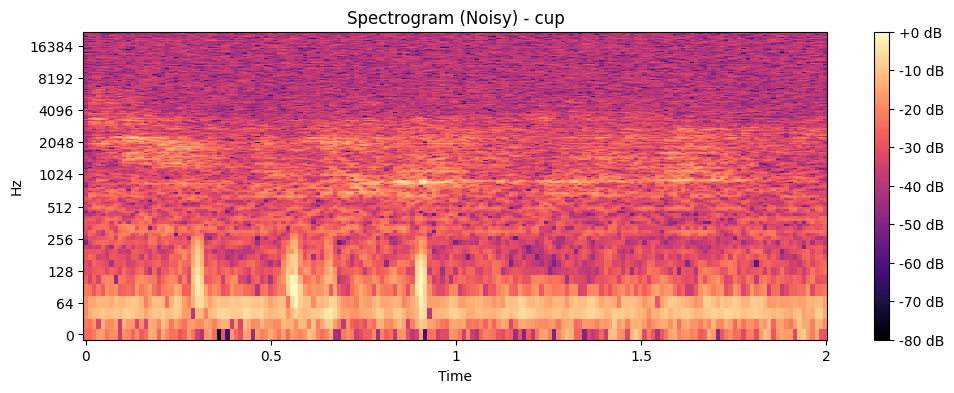

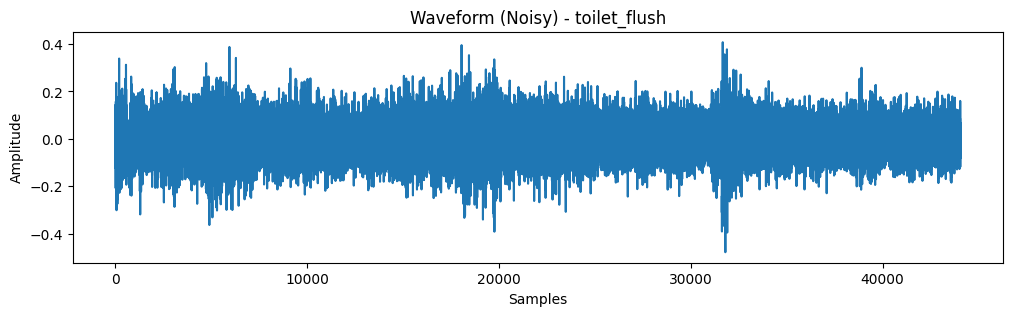

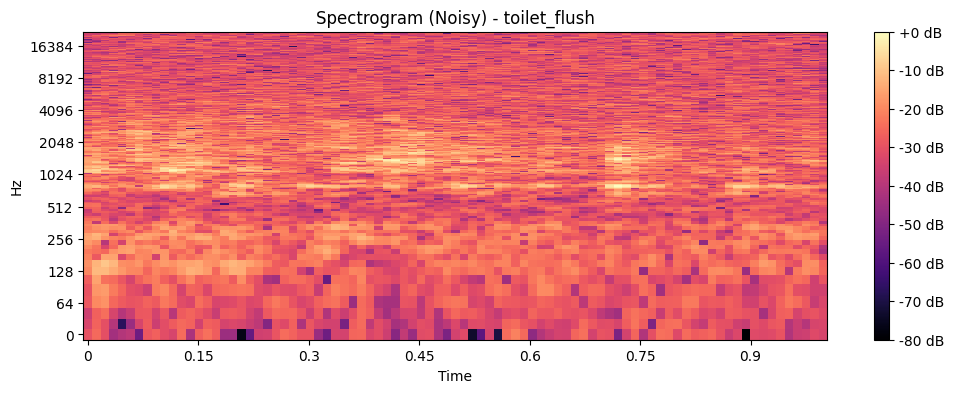

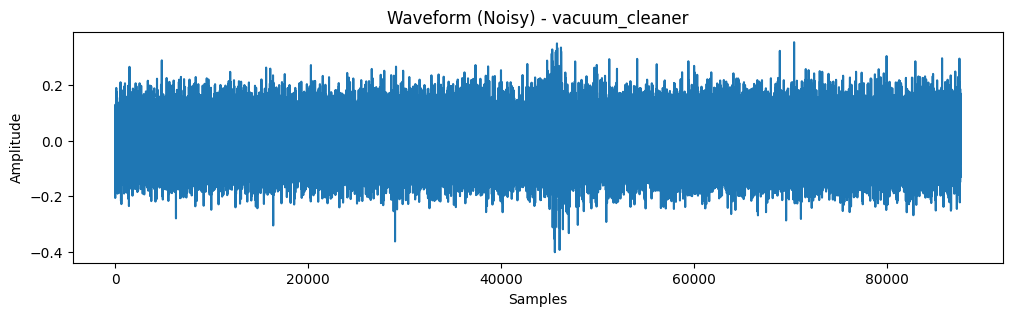

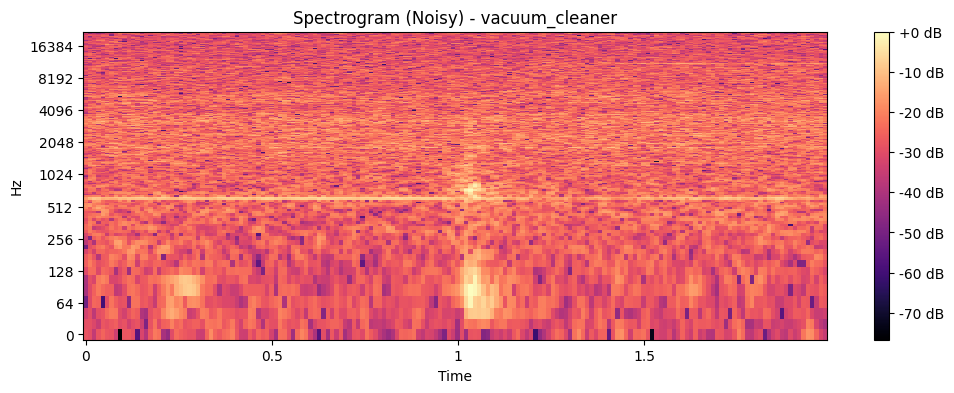

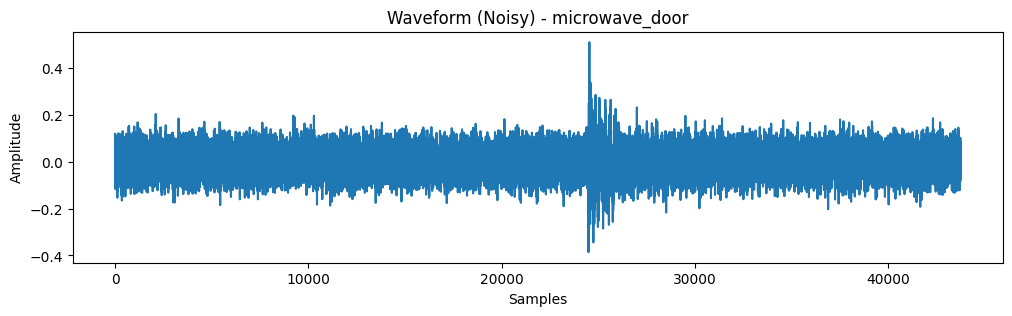

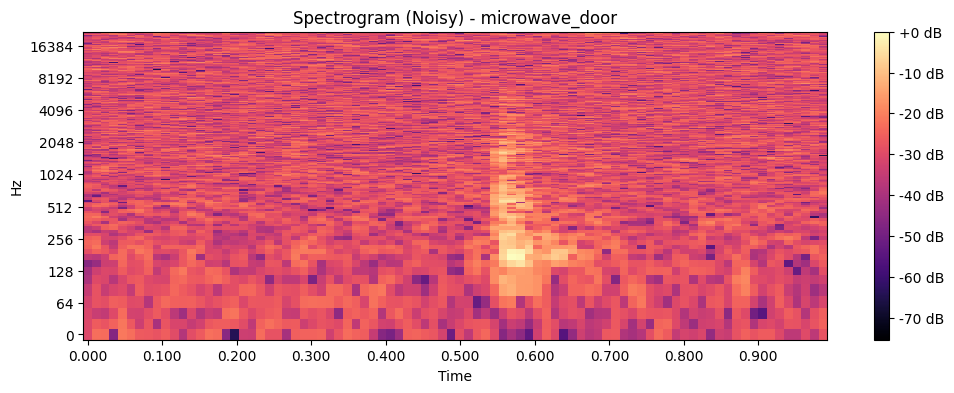

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path to training segments
data_path = "/Users/mayuri/Neuromorphic Project/Dataset/building_106_kitchen/training_segments"

# List of class folders
classes = [cls for cls in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, cls))]
print("Classes found:", classes)

file_counts = [len(os.listdir(os.path.join(data_path, cls))) for cls in classes]

plt.figure(figsize=(12,4))
plt.bar(classes, file_counts)
plt.xticks(rotation=45)
plt.ylabel("Number of files")
plt.title("Number of audio files per class")
plt.show()

# Function to add Gaussian noise
def add_noise(signal, noise_level=0.05):
    noise = noise_level * np.random.randn(len(signal))
    return signal + noise

# visualize some waveforms and spectrograms
for cls in classes[:10]:  # first 10 classes for visualization
    cls_path = os.path.join(data_path, cls)
    files = os.listdir(cls_path)
    if not files:
        continue
    file_path = os.path.join(cls_path, files[0])
    
    # Load audio
    y, sr = librosa.load(file_path, sr=None)
    
    # Add noise
    y_noisy = add_noise(y, noise_level=0.05)
    
    # Plot waveform
    plt.figure(figsize=(12,3))
    plt.plot(y_noisy)
    plt.title(f"Waveform (Noisy) - {cls}")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.show()
    
    # Plot spectrogram
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y_noisy)), ref=np.max)
    plt.figure(figsize=(12,4))
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram (Noisy) - {cls}")
    plt.show()
